### 1. 什么是最优化

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

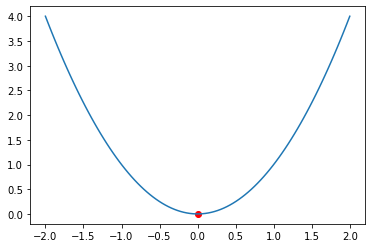

In [2]:
x = np.linspace(-2,2,100)
y = x**2
plt.plot(x,y);
plt.scatter(0,0,color='red');

### 2. 梯度下降算法

In [4]:
def min_gred(x_start, rate, num, f,g):
    x = x_start
    for n in range(num):
        gx = g(x)
        y = f(x)
        x = x - rate*gx # 梯度下降
        print("X:{x:.2f}, Y:{y:.2f}, gx:{gx:.2f}".format(x=x, y=y,gx=gx))
        if abs(gx)<0.0001:
            break
    return x
        

In [5]:
f = lambda x:x**2
g = lambda x: 2*x

In [6]:
min_gred(2,0.1, 10,f,g)

X:1.60, Y:4.00, gx:4.00
X:1.28, Y:2.56, gx:3.20
X:1.02, Y:1.64, gx:2.56
X:0.82, Y:1.05, gx:2.05
X:0.66, Y:0.67, gx:1.64
X:0.52, Y:0.43, gx:1.31
X:0.42, Y:0.27, gx:1.05
X:0.34, Y:0.18, gx:0.84
X:0.27, Y:0.11, gx:0.67
X:0.21, Y:0.07, gx:0.54


0.21474836480000006

In [7]:
min_gred(2,0.3, 10,f,g)

X:0.80, Y:4.00, gx:4.00
X:0.32, Y:0.64, gx:1.60
X:0.13, Y:0.10, gx:0.64
X:0.05, Y:0.02, gx:0.26
X:0.02, Y:0.00, gx:0.10
X:0.01, Y:0.00, gx:0.04
X:0.00, Y:0.00, gx:0.02
X:0.00, Y:0.00, gx:0.01
X:0.00, Y:0.00, gx:0.00
X:0.00, Y:0.00, gx:0.00


0.00020971520000000014

In [8]:
min_gred(2,1.1, 10,f,g)

X:-2.40, Y:4.00, gx:4.00
X:2.88, Y:5.76, gx:-4.80
X:-3.46, Y:8.29, gx:5.76
X:4.15, Y:11.94, gx:-6.91
X:-4.98, Y:17.20, gx:8.29
X:5.97, Y:24.77, gx:-9.95
X:-7.17, Y:35.66, gx:11.94
X:8.60, Y:51.36, gx:-14.33
X:-10.32, Y:73.95, gx:17.20
X:12.38, Y:106.49, gx:-20.64


12.383472844800014

### 3. 遗传算法

In [9]:
x = np.linspace(-2,2,100)
def func(x):
    return x**2
y = func(x)


In [10]:

num = 10
pop = np.random.uniform(low=-2,high=2,size=num)

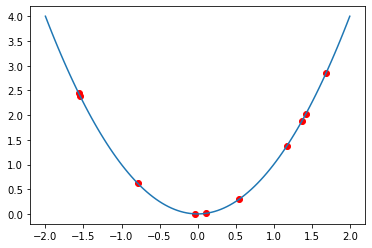

In [11]:
plt.plot(x,y);
y_fit = [func(i) for i in pop]
plt.scatter(pop, y_fit,c='r');


In [12]:
def fitness(x):
    if (x>2 or x<-2):  
        return -100
    else: 
        return -x**2


In [14]:
def fitness_pop(pop):
    return sum(fitness(x) for x in pop)/len(pop)

fitness_pop(pop)

-1.390999028325801

In [15]:

# def fitness_pop(pop):
#     return np.sum(fitness(x) for x in pop)/len(pop)

# fitness_pop(pop)

In [17]:
def fitness_prob(pop):
    return np.exp([fitness(x) for x in pop])/sum(np.exp([fitness(x) for x in pop]))

fitness_prob(pop)


array([0.02298613, 0.13295679, 0.01425213, 0.24449924, 0.03255845,
       0.0214153 , 0.18392559, 0.03763869, 0.06228121, 0.24748648])

In [18]:

def crossover(p1,p2):
    weight = np.random.rand()
    p1_sub = p1*weight
    p2_sub = p2*(1-weight)
    children = p1_sub+p2_sub
    return children


In [19]:

def mutate(p):
    step = np.random.randn()*0.1
    children = p+step
    return children


In [20]:
# 进化参数
cross_rate = 0.8 # 杂交率
mut_rate = 0.1 # 变异率

In [21]:
# begin
pop_parent = pop
pop_fit = fitness_pop(pop_parent)

iter_num = 0
while iter_num < 10:
    pop_children  = pop_parent.copy()
    prob = fitness_prob(pop_children)  # 计算父群适应度概率
    parent1_num = int(cross_rate*num)  # 根据杂交概率计算杂交数量
    # 从个体中抽取待杂交基因编号
    cross_index = np.random.choice(num, parent1_num, replace=False) 
    for i in cross_index: # 待杂交个体和其它随机个体进行杂交
        pop_children[i] = crossover(pop_children[i], pop_children[int(np.random.choice(len(pop_children),1,p=prob))])

    mut_num = int(mut_rate*num) # 计算待变异基因数量
    mut_index = np.random.choice(num, mut_num,replace=False)  # 抽取待变异基因编号

    for i in mut_index:
        pop_children[i] = mutate(pop_children[i]) 
    # 上下双代合并排序
    pop_group = np.concatenate([pop_children,pop_parent])
    prob = fitness_prob(pop_group)
    next_index = np.argsort(prob)[-num:]
    pop_parent = pop_group[next_index] # 优秀的变成下一代
    pop_fit = fitness_pop(pop_children)
    print("第{n}代种群的适应度：{x:.3f}".format(n=iter_num, x=pop_fit))
    iter_num = iter_num + 1   # 进入下一轮

第0代种群的适应度：-0.547
第1代种群的适应度：-0.072
第2代种群的适应度：-0.001
第3代种群的适应度：-0.000
第4代种群的适应度：-0.002
第5代种群的适应度：-0.000
第6代种群的适应度：-0.000
第7代种群的适应度：-0.002
第8代种群的适应度：-0.001
第9代种群的适应度：-0.001


In [22]:
pop_children

array([-6.30351621e-04,  1.62518054e-04,  6.66723637e-04, -6.49771053e-04,
        7.11342544e-02, -3.00620197e-04, -3.59924475e-04,  2.25804632e-04,
       -8.95414349e-05,  1.49450797e-04])

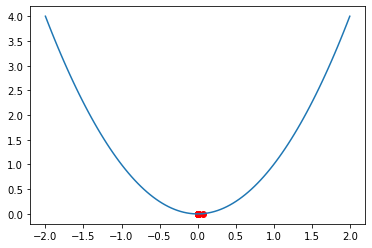

In [23]:
plt.plot(x,y);
pop_fit = [func(i) for i in pop_children]
plt.scatter(pop_children, pop_fit,c='r');


### 练习

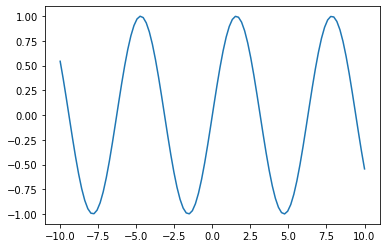

In [24]:
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y);


In [25]:
from sympy import Symbol, diff,sin
x = Symbol("x")
diff(sin(x),x)

cos(x)

In [27]:
def min_gred(x_start, rate, num, f,g):
    x = x_start
    for n in range(num):
        gx = g(x)
        y = f(x)
        x = x - rate*gx # 梯度下降
        print("X:{x:.2f}, Y:{y:.2f}, gx:{gx:.2f}".format(x=x, y=y,gx=gx))
        if abs(gx)<0.0001:
            break
    return x     

In [28]:
f = lambda x:np.sin(x)
g = lambda x:np.cos(x)

In [29]:
min_gred(0.1,0.2,20,f,g)

X:-0.10, Y:0.10, gx:1.00
X:-0.30, Y:-0.10, gx:1.00
X:-0.49, Y:-0.29, gx:0.96
X:-0.67, Y:-0.47, gx:0.88
X:-0.82, Y:-0.62, gx:0.79
X:-0.96, Y:-0.73, gx:0.68
X:-1.07, Y:-0.82, gx:0.57
X:-1.17, Y:-0.88, gx:0.48
X:-1.25, Y:-0.92, gx:0.39
X:-1.31, Y:-0.95, gx:0.32
X:-1.36, Y:-0.97, gx:0.26
X:-1.40, Y:-0.98, gx:0.21
X:-1.44, Y:-0.99, gx:0.17
X:-1.46, Y:-0.99, gx:0.13
X:-1.49, Y:-0.99, gx:0.11
X:-1.50, Y:-1.00, gx:0.09
X:-1.52, Y:-1.00, gx:0.07
X:-1.53, Y:-1.00, gx:0.05
X:-1.54, Y:-1.00, gx:0.04
X:-1.54, Y:-1.00, gx:0.04


-1.5426802075384614